In [1]:
clear all;
close all; 
clc;


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.



In [2]:
load("ECG_TP_repos.mat")
load("ECG_TP_effort.mat")

In [3]:
fe = 1000;
N = length(X_ECG_Rep);
t = linspace(0, N/fe, N);

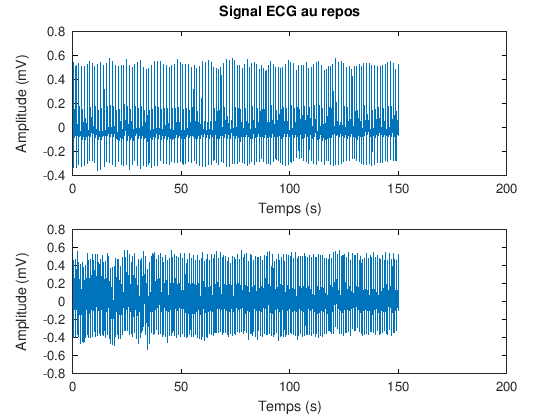

In [4]:
figure(1); 
subplot(2, 1, 1); 
plot(t, X_ECG_Rep);
xlabel('Temps (s)'); ylabel('Amplitude (mV)'); 
title('Signal ECG au repos')

subplot(2, 1, 2); 
plot(t, X_ECG_Eff);
xlabel('Temps (s)');
ylabel('Amplitude (mV)');

In [5]:
NFFT = 2 .^ nextpow2(N);
FFT_ECG_Rep = fft(X_ECG_Rep, NFFT);
FFT_ECG_Eff = fft(X_ECG_Eff, NFFT);
f = fe/2 * linspace(0, 1, NFFT/2);

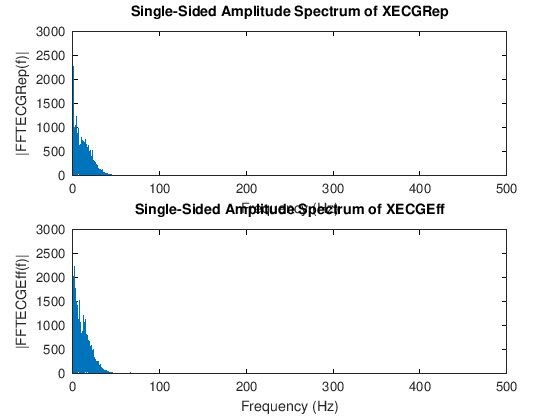

In [6]:
figure(2);
subplot(2, 1, 1); plot(f, 2*abs(FFT_ECG_Rep(1:NFFT/2)));
xlabel('Frequency (Hz)'); ylabel('|FFTECGRep(f)|'); 
title('Single-Sided Amplitude Spectrum of XECGRep');
subplot(2, 1, 2); plot(f, 2*abs(FFT_ECG_Eff(1:NFFT/2)));
xlabel('Frequency (Hz)'); ylabel('|FFTECGEff(f)|'); 
title('Single-Sided Amplitude Spectrum of XECGEff');